In [56]:
#Importing Relevant libraries and importing data from CSV

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


historicalEmissions = pd.read_csv('/Users/jamiehoughton/JamiesProjects/historical_emissions.csv')



I want to see a summary of the data I have just imported.

In [57]:

print(historicalEmissions.head())

   ISO         Country    Data source                Sector      Gas    Unit  \
0  RUS          Russia  Climate Watch  Total including LUCF  All GHG  MtCO₂e   
1  DEU         Germany  Climate Watch  Total including LUCF  All GHG  MtCO₂e   
2  TUR         Türkiye  Climate Watch  Total including LUCF  All GHG  MtCO₂e   
3  GBR  United Kingdom  Climate Watch  Total including LUCF  All GHG  MtCO₂e   
4  ITA           Italy  Climate Watch  Total including LUCF  All GHG  MtCO₂e   

      2020     2019     2018     2017  ...     1999     1998     1997  \
0  1799.98  1889.93  1843.24  1750.27  ...  1742.90  1712.17  1709.36   
1   681.18   740.08   791.00   819.67  ...   933.74   971.83   994.71   
2   476.34   462.83   474.88   474.47  ...   242.20   242.32   241.10   
3   411.12   452.15   468.34   476.57  ...   699.68   723.42   725.57   
4   339.21   377.08   386.15   391.20  ...   477.20   469.67   458.26   

      1996     1995     1994     1993     1992     1991     1990  
0  1858.96  1

I want to see how the total greenhouse gas emissions have changed over the past 30 years for the top 6 largest nations in the Europe and Central Asia dataset.

I need to reverse the data in the data frame as it currently is displaying 2020-1990 as oppose to 1990-2020.

/Users/jamiehoughton/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jamiehoughton/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jamiehoughton/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


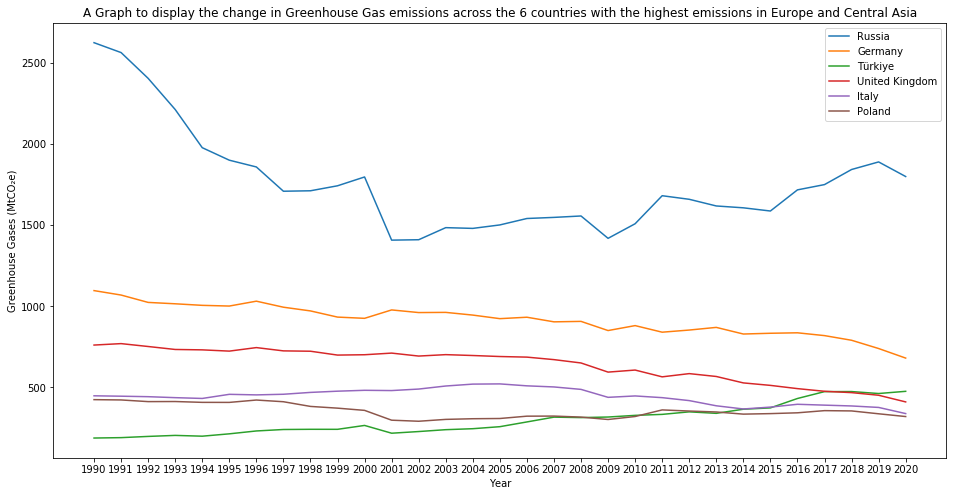

In [58]:
historicalEmissionsReverse = historicalEmissions.iloc[:, ::-1] #Switching the data round

plt.figure(figsize=(16,8))


for i in range(len(historicalEmissionsReverse)):
    plt.plot(historicalEmissionsReverse.columns[:31],historicalEmissionsReverse.iloc[i, :31], label=historicalEmissionsReverse.iloc[i, -2])
    #Iterating over the dataframe and plotting the data from 1990 to 2020
    if i > 4: 
        break # when i gets to 5
   
plt.title("A Graph to display the change in Greenhouse Gas emissions across the 6 countries with the highest emissions in Europe and Central Asia")
plt.xlabel("Year")
plt.ylabel("Greenhouse Gases (MtCO₂e)")
plt.legend()
plt.show()


# show the graph


I want to see the how the total greenhouse gas emissions have changed over the past 30 years, along with how each country contributes to this. The best way to do this is with a stacked area graph.

<Figure size 1152x576 with 0 Axes>

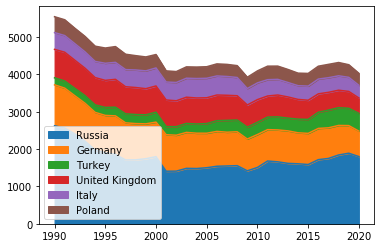

In [59]:
stackedPlotData = historicalEmissionsReverse.iloc[0:6, :31]

stackedPlotData_Transposed = stackedPlotData.T



stackedPlotData_Transposed.columns = ['Russia','Germany','Turkey','United Kingdom','Italy', 'Poland']

plt.figure(figsize=(16,8))

stackedPlotData_Transposed.plot.area()


I want to now have a look at individual countries and how the total Greenhouse Gas emissions are compromised. To do this I will need a second set of data. This is from the same source, however it breaks a single country's Total Greenhouse Gas emissions into various sectors. Let's start with Russia.

In [60]:
russia = pd.read_csv('/Users/jamiehoughton/JamiesProjects/ghg-emissions-russia.csv')

print(russia.head())

                         Sector    unit     1990     1991     1992     1993  \
0                        Energy  MtCO2e  2590.83  2538.49  2381.20  2216.29   
1          Industrial Processes  MtCO2e    57.34    56.62    75.03    59.25   
2                   Agriculture  MtCO2e   240.97   232.48   213.01   201.38   
3                         Waste  MtCO2e    81.12    81.55    81.04    81.32   
4  Land-Use Change and Forestry  MtCO2e  -345.04  -345.04  -345.32  -345.33   

      1994     1995     1996     1997  ...     2011     2012     2013  \
0  2010.63  1951.63  1916.61  1792.84  ...  2093.71  2060.00  2016.54   
1    49.89    49.71    42.45    44.50  ...    46.03    53.84    59.20   
2   181.46   163.16   150.32   134.69  ...    99.68    99.16    98.13   
3    81.08    81.51    81.56    82.11  ...   100.95   103.62   106.44   
4  -345.34  -345.36  -331.98  -344.77  ...  -658.67  -656.94  -661.75   

      2014     2015     2016     2017     2018     2019     2020  
0  1992.39  1980.99

I picked Russia to look at first becasue it has the largest amount of Greenhouse Gas Emissions and also the highest variation across the 30 year period. An interesting thing that strikes me is that the row marked "Land-Use Change and Forestry" has negative values. I want to investigate this further. I will start by plotting a stacked bar chart of the rest of the sectors and overlay the total Greenhouse Gas Emissions from the previous section on it.

/Users/jamiehoughton/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jamiehoughton/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jamiehoughton/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


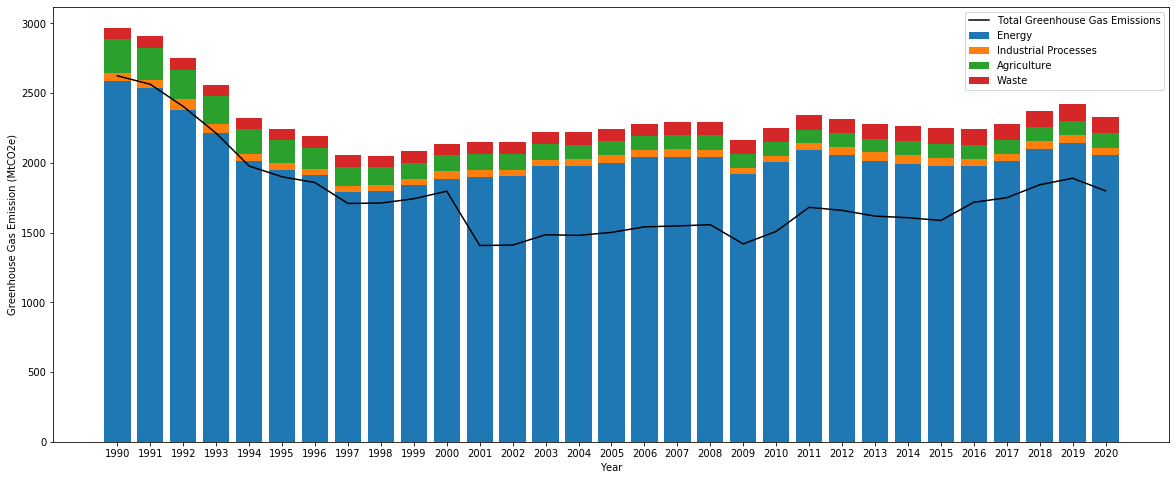

In [61]:
xlabel = 'Year'
ylabel = 'Greenhouse Gas Emission (MtCO2e)'

plt.figure(figsize=(20,8))

plt.plot(historicalEmissionsReverse.columns[:31],historicalEmissionsReverse.iloc[0, :31], label='Total Greenhouse Gas Emissions', color='black')


plt.bar(russia.columns[2:],russia.iloc[0, 2:], label=russia.iloc[0, 0])
plt.bar(russia.columns[2:],russia.iloc[1, 2:], label=russia.iloc[1, 0], bottom=russia.iloc[0, 2:])
plt.bar(russia.columns[2:],russia.iloc[2, 2:], label=russia.iloc[2, 0], bottom=(russia.iloc[0, 2:]+russia.iloc[1, 2:]))
plt.bar(russia.columns[2:],russia.iloc[3, 2:], label=russia.iloc[3, 0], bottom=(russia.iloc[0, 2:]+russia.iloc[1, 2:]+russia.iloc[2, 2:]))

plt.legend()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

The Total GHG Emission line follows the general trend of the bar chart, however is consistently below the top of the bar charts. This is due to the Land-Use Change and Forestry (LUCF). I will plot the same data below, but add the absolute value LUCF to the total GHG Emissions.

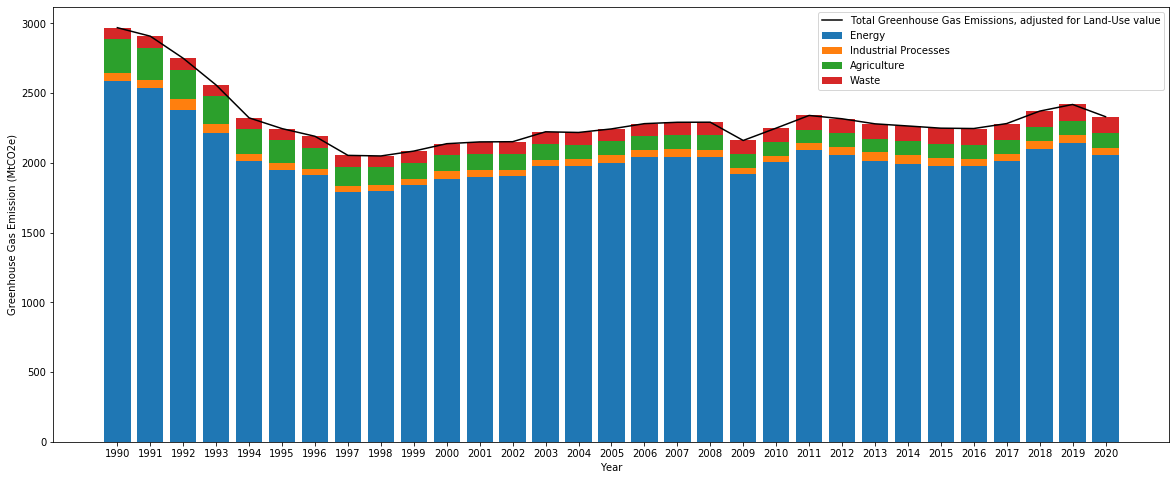

In [62]:
landUseAndForestry = russia.iloc[4, 2:]
landUseAndForestry = landUseAndForestry.abs()
totalRussiaGHG = (historicalEmissionsReverse.iloc[0, :31] + landUseAndForestry)


plt.figure(figsize=(20,8))
plt.plot(historicalEmissionsReverse.columns[:31],totalRussiaGHG, label='Total Greenhouse Gas Emissions, adjusted for Land-Use value', color='black')

plt.bar(russia.columns[2:],russia.iloc[0, 2:], label=russia.iloc[0, 0])
plt.bar(russia.columns[2:],russia.iloc[1, 2:], label=russia.iloc[1, 0], bottom=russia.iloc[0, 2:])
plt.bar(russia.columns[2:],russia.iloc[2, 2:], label=russia.iloc[2, 0], bottom=(russia.iloc[0, 2:]+russia.iloc[1, 2:]))
plt.bar(russia.columns[2:],russia.iloc[3, 2:], label=russia.iloc[3, 0], bottom=(russia.iloc[0, 2:]+russia.iloc[1, 2:]+russia.iloc[2, 2:]))

plt.legend()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()


The Total GHG Emissions, adjusted for Land-Use now fits the gross GHG Emissions of Russia. I want to map similar graphs for the other 5 Countries.

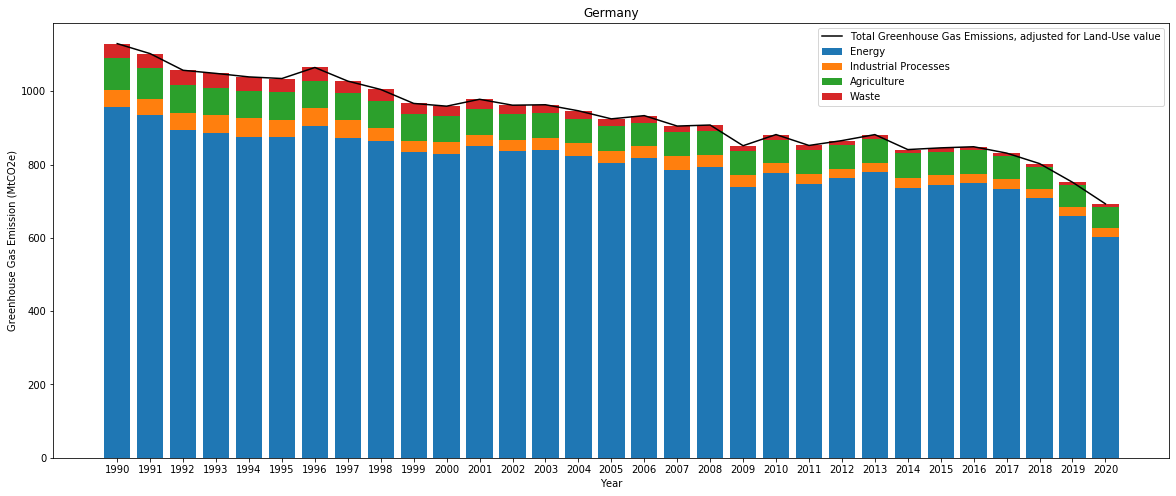

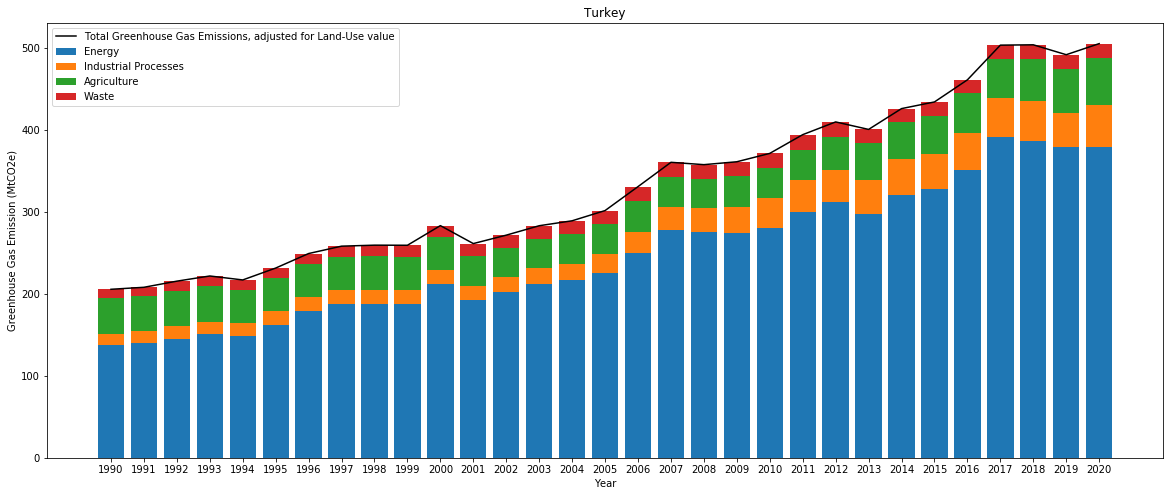

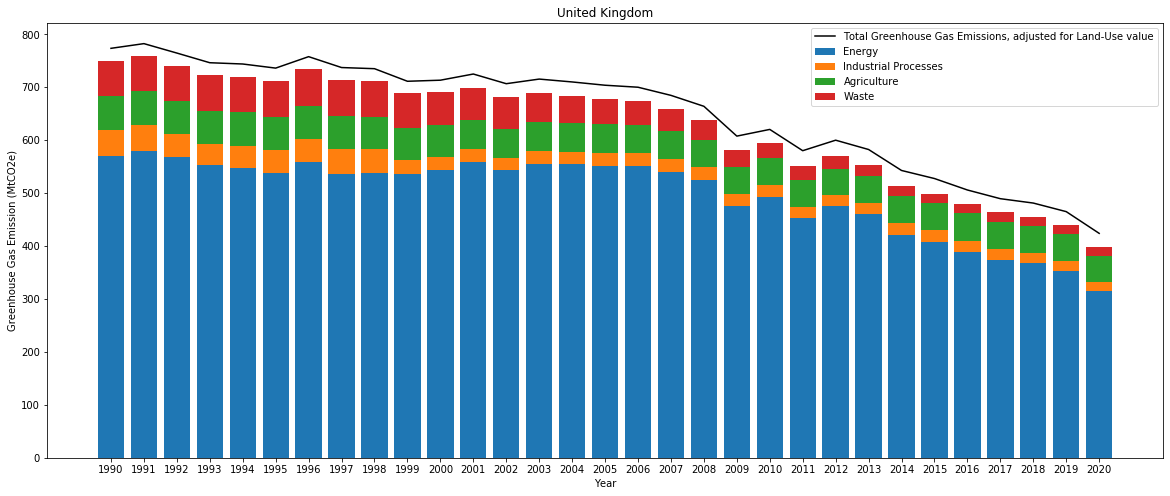

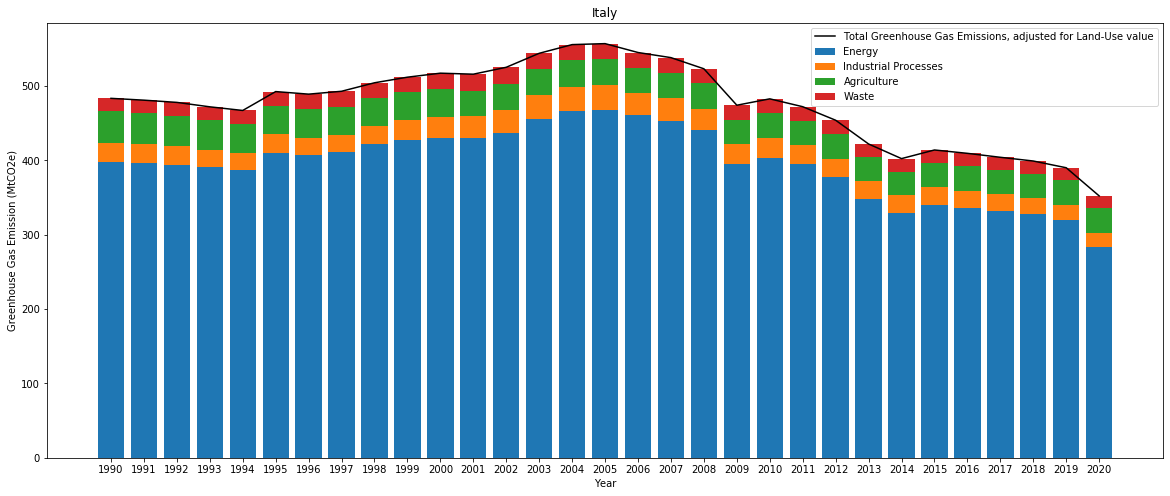

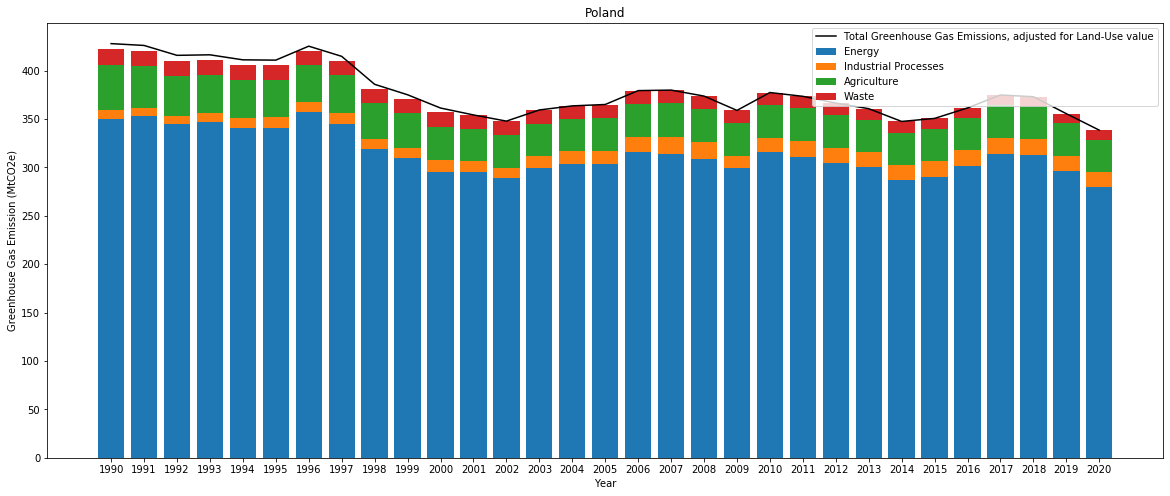

In [63]:

def plottingBarCharts(dataFrame, title):
    landUseAndForestry = dataFrame.iloc[4, 2:]
    landUseAndForestry = landUseAndForestry.abs()

    sumDataFrame = dataFrame.iloc[:, 2:]
    sumDataFrame = sumDataFrame.sum()

    totalDataFrame= (sumDataFrame + landUseAndForestry)


    plt.figure(figsize=(20,8))
    plt.plot(historicalEmissionsReverse.columns[:31],totalDataFrame, label='Total Greenhouse Gas Emissions, adjusted for Land-Use value', color='black')

    plt.bar(dataFrame.columns[2:],dataFrame.iloc[0, 2:], label=dataFrame.iloc[0, 0])
    plt.bar(dataFrame.columns[2:],dataFrame.iloc[1, 2:], label=dataFrame.iloc[1, 0], bottom=dataFrame.iloc[0, 2:])
    plt.bar(dataFrame.columns[2:],dataFrame.iloc[2, 2:], label=dataFrame.iloc[2, 0], bottom=(dataFrame.iloc[0, 2:]+dataFrame.iloc[1, 2:]))
    plt.bar(dataFrame.columns[2:],dataFrame.iloc[3, 2:], label=dataFrame.iloc[3, 0], bottom=(dataFrame.iloc[0, 2:]+dataFrame.iloc[1, 2:]+dataFrame.iloc[2, 2:]))

    plt.legend()
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Greenhouse Gas Emission (MtCO2e)')
    plt.show()

plottingBarCharts(pd.read_csv('/Users/jamiehoughton/JamiesProjects/ghg-emissions-germany.csv'), 'Germany')

plottingBarCharts(pd.read_csv('/Users/jamiehoughton/JamiesProjects/ghg-emissions-turkey.csv'), 'Turkey')

plottingBarCharts(pd.read_csv('/Users/jamiehoughton/JamiesProjects/ghg-emissions-uk.csv'), 'United Kingdom')

plottingBarCharts(pd.read_csv('/Users/jamiehoughton/JamiesProjects/ghg-emissions-italy.csv'), 'Italy')

plottingBarCharts(pd.read_csv('/Users/jamiehoughton/JamiesProjects/ghg-emissions-poland.csv'), 'Poland')